In [85]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:

df = pd.read_csv(r"E:\Mi unidad\RESPALDO\TEC\100 days of python\Day72\QueryResults.csv", names = ['DATE', 'TAG', 'POSTS'])

In [5]:
df.head()

,DATE,TAG,POSTS
0,m,TagName,NaN
1,2008-07-01 00:00:00,c#,3.0
2,2008-08-01 00:00:00,assembly,8.0
3,2008-08-01 00:00:00,javascript,162.0
4,2008-08-01 00:00:00,c,85.0


In [6]:
df.tail()

,DATE,TAG,POSTS
1987,2020-07-01 00:00:00,r,5694.0
1988,2020-07-01 00:00:00,go,743.0
1989,2020-07-01 00:00:00,ruby,775.0
1990,2020-07-01 00:00:00,perl,182.0
1991,2020-07-01 00:00:00,swift,3607.0


In [9]:
df.shape

(1992, 3)

In [17]:
df.count()

DATE     1992
TAG      1992
POSTS    1991
dtype: int64

In [42]:
df_clean = df.iloc[1: , :]

The TAG is the name of the programming language. So for example in July 2008, there were 3 posts tagged with the language C#. Given that the TAG serves as our category column, can you figure out how to count the number of posts per language? Which programming language had the most number of posts since the creation of Stack Overflow? (Hint: you may need to review one of yesterday's lessons).

Also, some languages are older like C and other languages are newer (like Swift). The dataset starts in July 2008, so some languages will not have any posts for every month. Can you count how many months of posts exist for each programming language?

In [43]:
df_clean.groupby(by = ["TAG"]).sum().sort_values(by = "POSTS",ascending=False)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2636\25931128.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_clean.groupby(by = ["TAG"]).sum().sort_values(by = "POSTS",ascending=False)


,POSTS
TAG,
javascript,2056510.0
java,1696403.0
python,1496210.0
c#,1423530.0
php,1361988.0
c++,684210.0
r,356799.0
c,336042.0
swift,273055.0


In [60]:
df_clean.groupby(by = ["TAG"]).count().sort_values(by = "DATE",ascending=False)

,DATE,POSTS
TAG,,
c#,145,145
assembly,144,144
c,144,144
c++,144,144
delphi,144,144
java,144,144
javascript,144,144
perl,144,144
php,144,144


In [62]:
df_clean["DATE"] = pd.to_datetime(df_clean["DATE"])
df_clean.head()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2636\159482345.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["DATE"] = pd.to_datetime(df_clean["DATE"])


,DATE,TAG,POSTS
1,2008-07-01,c#,3.0
2,2008-08-01,assembly,8.0
3,2008-08-01,javascript,162.0
4,2008-08-01,c,85.0
5,2008-08-01,python,124.0


Can you pivot the df DataFrame so that each row is a date and each column is a programming language? Store the result under a variable called reshaped_df. 

In [75]:
reshaped_df = df_clean.pivot(index = "DATE",columns = "TAG", values="POSTS")
reshaped_df.fillna(0, inplace = True)

In [76]:
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,73.0,0.0
2008-09-01,28.0,321.0,1649.0,755.0,105.0,0.0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0.0
2008-10-01,15.0,303.0,1989.0,811.0,112.0,0.0,1153.0,725.0,127.0,617.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,579.0,97.0,504.0,452.0,1.0,160.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-01,317.0,2670.0,8954.0,5107.0,181.0,719.0,13253.0,20483.0,215.0,6672.0,26673.0,5761.0,780.0,3434.0
2020-04-01,406.0,3472.0,10042.0,6820.0,250.0,887.0,15377.0,24634.0,240.0,8060.0,32605.0,7047.0,860.0,4015.0
2020-05-01,386.0,3602.0,9923.0,7063.0,221.0,826.0,14711.0,25196.0,228.0,7917.0,34478.0,6833.0,774.0,4066.0


Examine the dimensions of the reshaped DataFrame. How many rows does it have? How many columns?

In [77]:
reshaped_df.shape

(145, 14)

In [78]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,73.0,0.0
2008-09-01,28.0,321.0,1649.0,755.0,105.0,0.0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0.0
2008-10-01,15.0,303.0,1989.0,811.0,112.0,0.0,1153.0,725.0,127.0,617.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,579.0,97.0,504.0,452.0,1.0,160.0,0.0


In [79]:
reshaped_df.tail()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2020-03-01,317.0,2670.0,8954.0,5107.0,181.0,719.0,13253.0,20483.0,215.0,6672.0,26673.0,5761.0,780.0,3434.0
2020-04-01,406.0,3472.0,10042.0,6820.0,250.0,887.0,15377.0,24634.0,240.0,8060.0,32605.0,7047.0,860.0,4015.0
2020-05-01,386.0,3602.0,9923.0,7063.0,221.0,826.0,14711.0,25196.0,228.0,7917.0,34478.0,6833.0,774.0,4066.0
2020-06-01,363.0,2757.0,9064.0,6161.0,214.0,765.0,13015.0,23360.0,203.0,7188.0,31817.0,6249.0,670.0,3733.0
2020-07-01,298.0,2294.0,9145.0,5756.0,212.0,743.0,12723.0,23802.0,182.0,7334.0,31261.0,5694.0,775.0,3607.0


In [80]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [84]:
reshaped_df.count()

TAG
assembly      145
c             145
c#            145
c++           145
delphi        145
go            145
java          145
javascript    145
perl          145
php           145
python        145
r             145
ruby          145
swift         145
dtype: int64

## matplotlib

<Figure size 1600x1600 with 0 Axes>

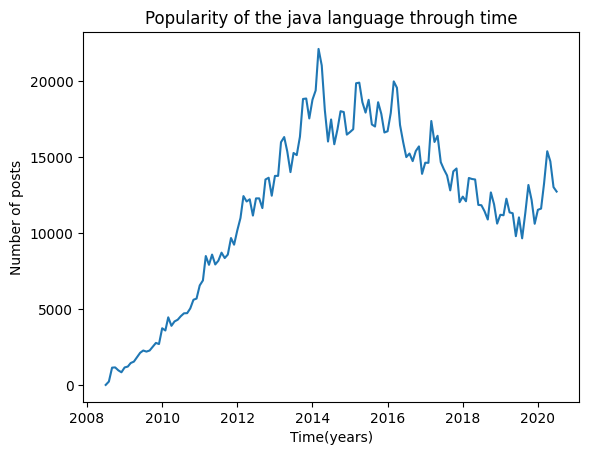

<Figure size 1600x1600 with 0 Axes>

In [96]:
lang = "java"
plt.plot(reshaped_df.index,reshaped_df[lang])
plt.title(f"Popularity of the {lang} language through time")
plt.xlabel("Time(years)")
plt.ylabel("Number of posts")
plt.figure(figsize=(16,16))

<Figure size 1600x1600 with 0 Axes>

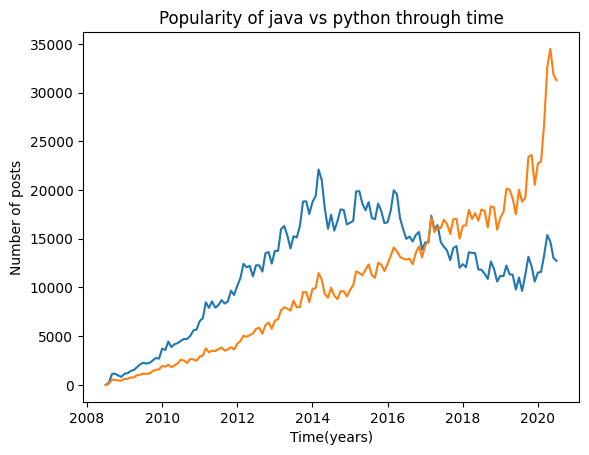

<Figure size 1600x1600 with 0 Axes>

In [98]:
lang = "java"
lang2 = "python"
plt.plot(reshaped_df.index,reshaped_df[lang])
plt.plot(reshaped_df.index, reshaped_df[lang2])
plt.title(f"Popularity of {lang} vs {lang2} through time")
plt.xlabel("Time(years)")
plt.ylabel("Number of posts")
plt.figure(figsize=(16,16))

<Figure size 3000x2000 with 0 Axes>

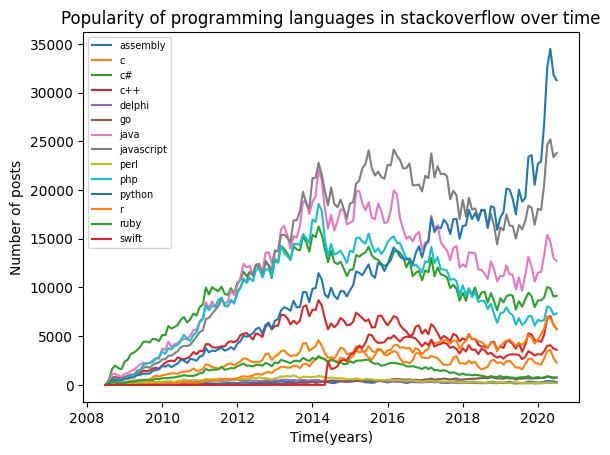

<Figure size 3000x2000 with 0 Axes>

In [116]:

for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column], label=reshaped_df[column].name)

plt.legend(fontsize = 7)
plt.title("Popularity of programming languages in stackoverflow over time")
plt.xlabel("Time(years)")
plt.ylabel("Number of posts")
plt.figure(figsize=(30,20))



## Smoothing out the data

<Figure size 3000x2000 with 0 Axes>

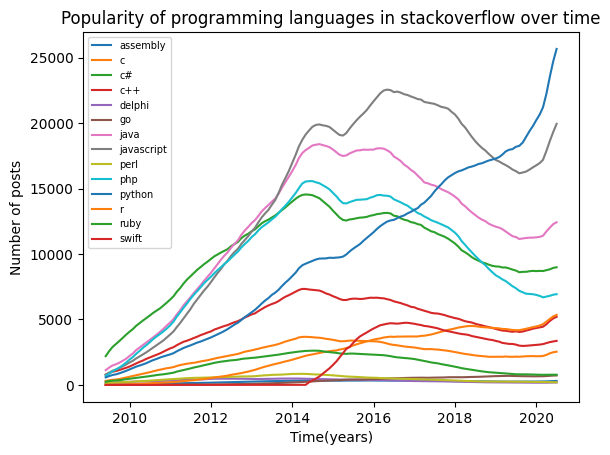

<Figure size 3000x2000 with 0 Axes>

In [122]:
roll_df = reshaped_df.rolling(window = 12).mean()

for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], label=roll_df[column].name)

plt.legend(fontsize = 7)
plt.title("Popularity of programming languages in stackoverflow over time")
plt.xlabel("Time(years)")
plt.ylabel("Number of posts")
plt.figure(figsize=(30,20))